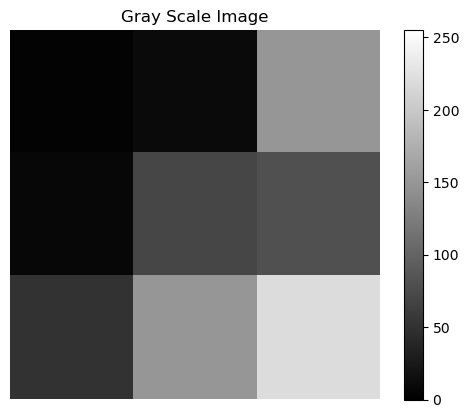

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# gray scale image
img = np.array([
    [3, 10, 150],
    [7, 70, 80],
    [50, 150, 220] ], dtype=np.uint8)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Gray Scale Image")
plt.axis('off')
plt.show()

# 2. Interpolation (using Library Function)
     - Nearest Neighbour Interpolation
     - Bilinear Interpolation
     - Bicubic Interpolation

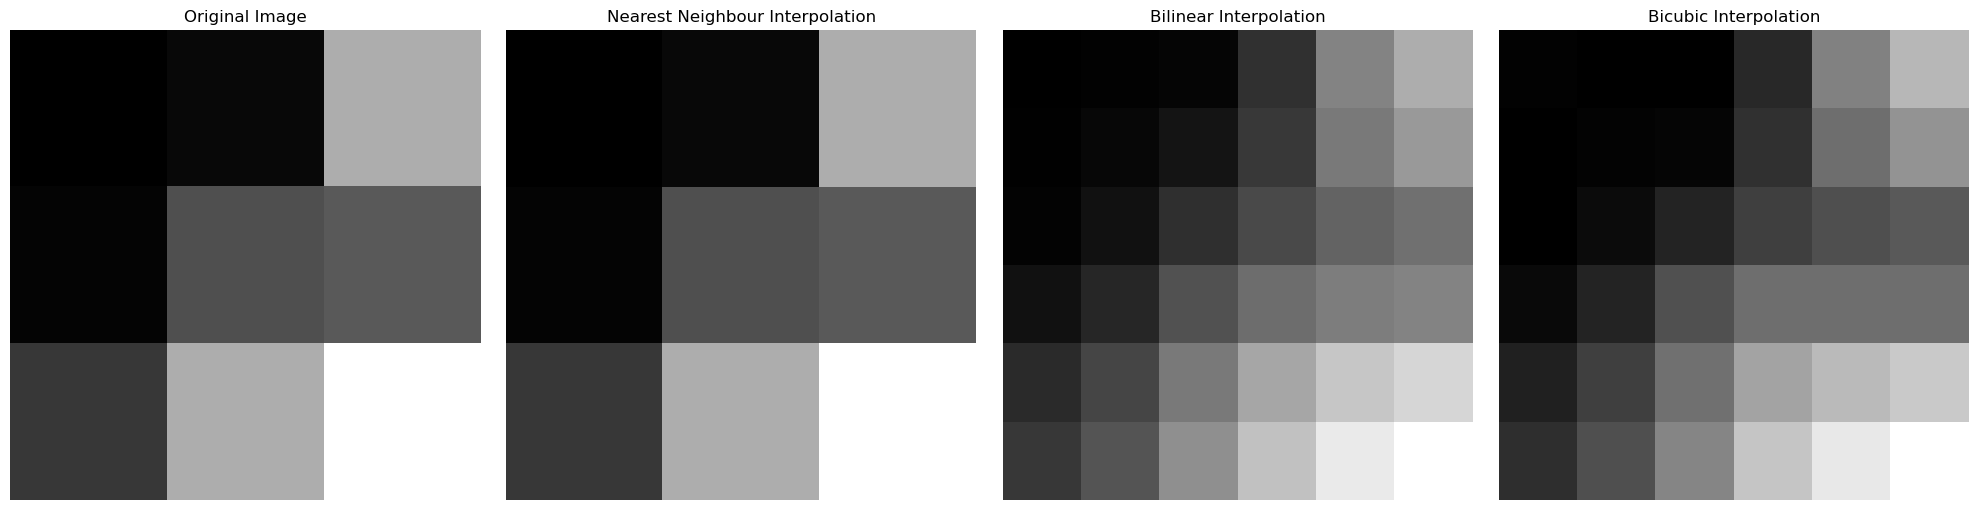

In [9]:
nearest  = cv2.resize(img, (6, 6), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img, (6, 6), interpolation = cv2.INTER_LINEAR)
bicubic  = cv2.resize(img, (6, 6), interpolation = cv2.INTER_CUBIC)

# plot

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(nearest, cmap='gray')
plt.title("Nearest Neighbour Interpolation")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(bilinear, cmap='gray')
plt.title("Bilinear Interpolation")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(bicubic, cmap='gray')
plt.title("Bicubic Interpolation")
plt.axis("off")

plt.tight_layout()
plt.show()

# 3. Bilinear Interpolation (manually)

[[  3   5   8  45 115 150]
 [  4   9  20  52 106 132]
 [  6  18  43  66  87  98]
 [ 18  36  72  96 109 115]
 [ 39  62 107 144 171 185]
 [ 50  75 125 168 202 220]]


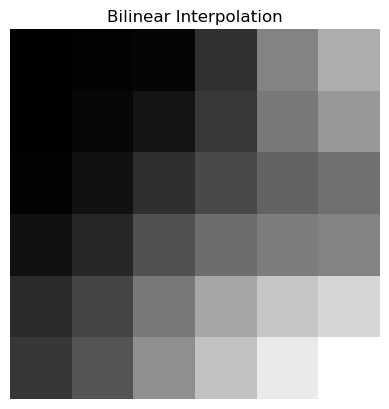

In [12]:
import math
Win = len(img[0])
Hin = len(img)
Wout = 6
Hout = 6

img_out = np.zeros((Hout, Wout), dtype= np.uint8)

W_scale = Win / Wout
H_Sscale = Hin / Hout

for i in range(Hout):
    for j in range(Wout):
        X = (j + 0.5) * W_scale - 0.5
        Y = (i + 0.5) * H_Sscale - 0.5

        X0 = math.floor(X)
        Y0 = math.floor(Y)

        X1 = min(X0 + 1, Win - 1)
        Y1 = min(Y0 + 1, Hin - 1)

        if X0 < 0:
            X0 = 0
        if Y0 < 0:
            Y0 = 0

        if X1 >= Win:
            X1 = Win - 1
        if Y1 >= Hin:
            Y1 = Hin - 1

        dx = X - X0
        dy = Y - Y0

        A = img[Y0, X0]
        B = img[Y0, X1]
        C = img[Y1, X0]
        D = img[Y1, X1]


        Top = A * (1 - dx) + B * dx
        Bottom = C * (1 - dx) + D  * dx
        val = Top * (1 - dy) + Bottom * dy

        img_out[i, j] = round(val)


print(img_out)

plt.imshow(img_out, cmap='gray')
plt.title("Bilinear Interpolation")
plt.axis('off')
plt.show()









# 4. Comparison

[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


(np.float64(-0.5), np.float64(5.5), np.float64(5.5), np.float64(-0.5))

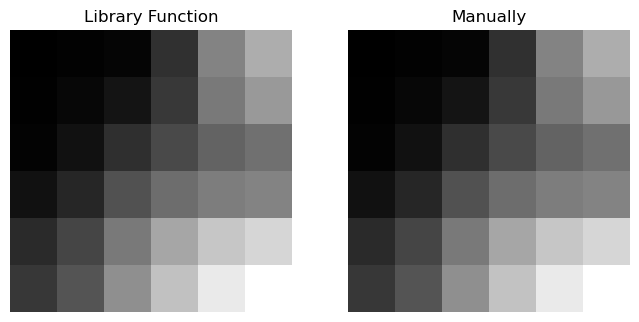

In [14]:
diff = abs(img_out.astype(np.int16) - bilinear.astype(np.int16))
print(diff)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(bilinear, cmap='gray')
plt.title("Library Function")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_out, cmap='gray')
plt.title("Manually")
plt.axis("off")

